In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [ ]:
df_train = pd.read_csv("numeric_train_data.csv")
df_test = pd.read_csv("numeric_test_data.csv")
df_train.head(5)
df_test.head(5)

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label
0,0.715236,0.693741,0.673291,0.675155,0.718251,0.703219,0.706388,0.757179,0.673783,0.617892,...,0.438356,0.592341,0.422709,0.600324,0.491890,0.654020,0.516087,0.745383,0.426049,0
1,0.638202,0.539125,0.413576,0.500710,0.633080,0.634422,0.585670,0.579234,0.597464,0.582047,...,0.351815,0.528008,0.416186,0.631978,0.522208,0.740917,0.466066,0.713554,0.401167,0
2,0.300166,0.289997,0.279196,0.318552,0.343168,0.292658,0.251033,0.396900,0.611866,0.711495,...,0.113269,0.463730,0.372439,0.567525,0.539345,0.616263,0.191980,0.342027,0.198181,1
3,0.697828,0.647420,0.581630,0.592989,0.683064,0.710182,0.698529,0.667966,0.691158,0.685162,...,0.419216,0.668173,0.503341,0.626000,0.538417,0.697739,0.478217,0.811338,0.518223,0
4,0.370128,0.508962,0.492916,0.391020,0.363103,0.367662,0.399747,0.469762,0.498174,0.399316,...,0.409716,0.630644,0.338582,0.540950,0.436101,0.765488,0.450831,0.634361,0.329778,1


In [7]:
# Acak urutan baris pada dataset train dan test
# df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
# df_test  = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan fitur (X) dan label (y)
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


In [ ]:

# Initialize model and CV
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=6, random_state=42)

# Output file path
output_path = 'custom_rfecv_results_rf.csv'

# Remove file if exists (only once, at start)
if os.path.exists(output_path):
    os.remove(output_path)

# Loop over number of features
for k in tqdm(range(1, X_train.shape[1] + 1)):  # 1 to total number of features
    rfe = RFE(estimator=rf, n_features_to_select=k, step=1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    temp_results = []

    for rep_id, (train_idx, test_idx) in enumerate(cv.split(X_train_rfe, y_train)):
        X_tr, X_te = X_train_rfe[train_idx], X_train_rfe[test_idx]
        y_tr, y_te = y_train[train_idx], y_train[test_idx]

        rf.fit(X_tr, y_tr)
        y_pred = rf.predict(X_te)
        acc = accuracy_score(y_te, y_pred)

        temp_results.append({
            "n_features": k,
            "repetition": rep_id,
            "accuracy": acc
        })

    # Append to CSV after each k
    pd.DataFrame(temp_results).to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

    print(f"✔️ Feature set with {k} features saved.")


  5%|▌         | 1/20 [01:23<26:28, 83.60s/it]

✔️ Feature set with 1 features saved.


 10%|█         | 2/20 [02:55<26:29, 88.31s/it]

✔️ Feature set with 2 features saved.


 15%|█▌        | 3/20 [04:25<25:13, 89.01s/it]

✔️ Feature set with 3 features saved.


 20%|██        | 4/20 [05:54<23:48, 89.27s/it]

✔️ Feature set with 4 features saved.


 25%|██▌       | 5/20 [07:23<22:16, 89.13s/it]

✔️ Feature set with 5 features saved.


 30%|███       | 6/20 [08:51<20:40, 88.62s/it]

✔️ Feature set with 6 features saved.


 35%|███▌      | 7/20 [10:16<18:58, 87.60s/it]

✔️ Feature set with 7 features saved.


 40%|████      | 8/20 [11:40<17:17, 86.43s/it]

✔️ Feature set with 8 features saved.


 45%|████▌     | 9/20 [13:04<15:41, 85.56s/it]

✔️ Feature set with 9 features saved.


 50%|█████     | 10/20 [14:26<14:06, 84.65s/it]

✔️ Feature set with 10 features saved.


 55%|█████▌    | 11/20 [15:44<12:22, 82.47s/it]

✔️ Feature set with 11 features saved.


 60%|██████    | 12/20 [17:03<10:52, 81.53s/it]

✔️ Feature set with 12 features saved.


 65%|██████▌   | 13/20 [18:20<09:19, 79.97s/it]

✔️ Feature set with 13 features saved.


 70%|███████   | 14/20 [19:34<07:49, 78.33s/it]

✔️ Feature set with 14 features saved.


 75%|███████▌  | 15/20 [20:47<06:23, 76.62s/it]

✔️ Feature set with 15 features saved.


 80%|████████  | 16/20 [22:00<05:02, 75.54s/it]

✔️ Feature set with 16 features saved.


 85%|████████▌ | 17/20 [23:11<03:42, 74.25s/it]

✔️ Feature set with 17 features saved.


 90%|█████████ | 18/20 [24:19<02:24, 72.42s/it]

✔️ Feature set with 18 features saved.


 95%|█████████▌| 19/20 [25:25<01:10, 70.45s/it]

✔️ Feature set with 19 features saved.


100%|██████████| 20/20 [26:29<00:00, 79.45s/it]

✔️ Feature set with 20 features saved.


    n_features      mean       std        se
0            1  0.648500  0.006408  0.001170
1            2  0.740038  0.005297  0.000967
2            3  0.777899  0.005788  0.001057
3            4  0.803372  0.005218  0.000953
4            5  0.812118  0.004737  0.000865
5            6  0.828245  0.005009  0.000914
6            7  0.837554  0.004610  0.000842
7            8  0.850261  0.004139  0.000756
8            9  0.857308  0.005168  0.000944
9           10  0.866150  0.004208  0.000768
10          11  0.873546  0.004789  0.000874
11          12  0.878605  0.004911  0.000897
12          13  0.885252  0.004174  0.000762
13          14  0.891690  0.004052  0.000740
14          15  0.896883  0.004115  0.000751
15          16  0.898292  0.003070  0.000561
16          17  0.898827  0.004377  0.000799
17          18  0.903463  0.004502  0.000822
18          19  0.904227  0.004099  0.000748
19          20  0.906096  0.004521  0.000825
20          21  0.906890  0.003497  0.000639
21        

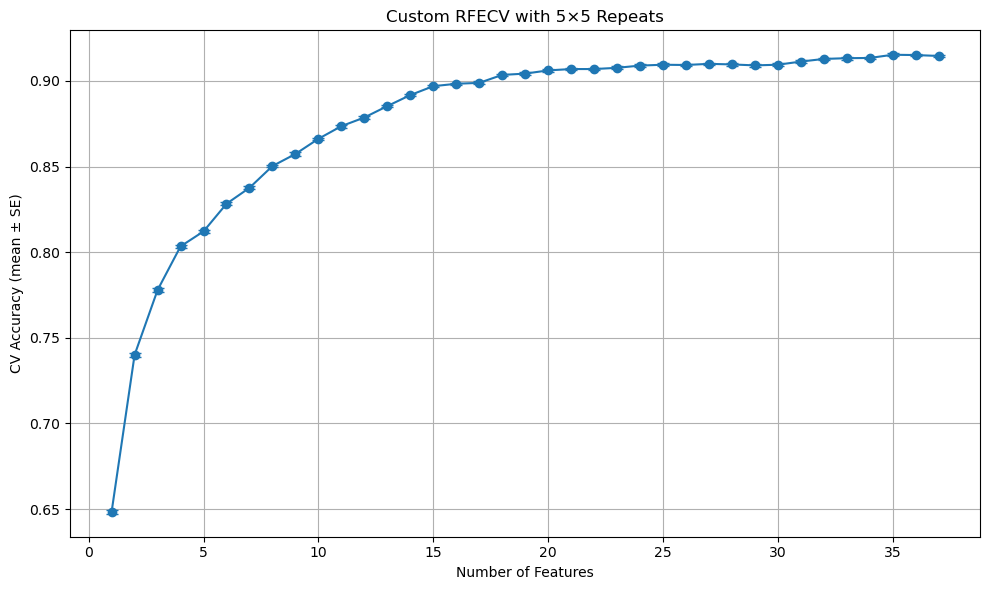

In [ ]:
# Baca data hasil RFECV jika belum ada di memori
df_custom_rfecv = pd.read_csv('custom_rfecv_results.csv', sep=";")  # ganti nama file jika SVM

# Ringkasan statistik: rata-rata, standar deviasi, dan standard error
summary = df_custom_rfecv.groupby('n_features')['accuracy'].agg(['mean', 'std']).reset_index()
summary['se'] = summary['std'] / np.sqrt(30)  # karena 5x5 = 25 evaluasi per jumlah fitur

# Tampilkan DataFrame summary (opsional)
print(summary)

# Plot akurasi dengan error bar (SE)
plt.figure(figsize=(10, 6))
plt.errorbar(summary['n_features'], summary['mean'], yerr=summary['se'], fmt='-o', capsize=4)
plt.xlabel("Number of Features")
plt.ylabel("CV Accuracy (mean ± SE)")
plt.title("Custom RFECV with 5×5 Repeats")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
summary.to_csv("summary_1se_rf.csv", index=False)

In [34]:
# 1. Akurasi terbaik dan SE-nya
best_row = summary.loc[summary['mean'].idxmax()]
best_score = best_row['mean']
best_se = best_row['se']
threshold = best_score - best_se

# 2. Cari jumlah fitur paling sedikit dengan akurasi >= threshold
parsimonious_row = summary[summary['mean'] >= threshold].iloc[0]

# 3. Hasil akhir
print("✅ Best score (mean CV accuracy):", round(best_score, 4))
print("✅ Best SE:", round(best_se, 4))
print("🎯 1-SE Threshold:", round(threshold, 4))
print("🔍 Parsimonious number of features:", parsimonious_row['n_features'])
print("📈 Accuracy at that point:", round(parsimonious_row['mean'], 4))


✅ Best score (mean CV accuracy): 0.9152
✅ Best SE: 0.0008
🎯 1-SE Threshold: 0.9144
🔍 Parsimonious number of features: 35.0
📈 Accuracy at that point: 0.9152


In [ ]:
# Inisialisasi model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Pastikan X_train dalam bentuk DataFrame
feature_names = X_train.columns



k=35
rfe = RFE(estimator=rf, n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)

# Ambil nama fitur yang terpilih
selected_features = feature_names[rfe.support_]

print(f"\nFitur terpilih untuk k={k}:")
for i, name in enumerate(selected_features, 1):
    print(f"{i}. {name}")


## SVM Algorithm

In [ ]:
# Inisialisasi model LinearSVC (lebih cepat dari SVC linear)
svm = LinearSVC(C=1.0, max_iter=5000, dual=False, random_state=42)

# Inisialisasi RepeatedStratifiedKFold: 5 fold × 6 repeat = 30 evaluasi per jumlah fitur
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=6, random_state=42)

# Path hasil output
output_path = 'custom_rfecv_results_linearsvc.csv'

# Hapus file jika sudah ada sebelumnya
if os.path.exists(output_path):
    os.remove(output_path)

# Loop dari 1 fitur sampai seluruh fitur
for k in tqdm(range(1, X_train.shape[1] + 1)):
    rfe = RFE(estimator=svm, n_features_to_select=k, step=1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    temp_results = []

    for rep_id, (train_idx, test_idx) in enumerate(cv.split(X_train_rfe, y_train)):
        X_tr, X_te = X_train_rfe[train_idx], X_train_rfe[test_idx]
        y_tr, y_te = y_train[train_idx], y_train[test_idx]

        svm.fit(X_tr, y_tr)
        y_pred = svm.predict(X_te)
        acc = accuracy_score(y_te, y_pred)

        temp_results.append({
            "n_features": k,
            "repetition": rep_id,
            "accuracy": acc
        })

    # Simpan hasil ke CSV setelah setiap jumlah fitur selesai
    pd.DataFrame(temp_results).to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

    print(f"✔️ Feature set with {k} features saved.")


  3%|▎         | 1/37 [00:08<04:52,  8.13s/it]

✔️ Feature set with 1 features saved.


  5%|▌         | 2/37 [00:19<05:57, 10.22s/it]

✔️ Feature set with 2 features saved.


  8%|▊         | 3/37 [00:32<06:24, 11.31s/it]

✔️ Feature set with 3 features saved.


 11%|█         | 4/37 [00:44<06:28, 11.79s/it]

✔️ Feature set with 4 features saved.


 14%|█▎        | 5/37 [00:57<06:31, 12.24s/it]

✔️ Feature set with 5 features saved.


 16%|█▌        | 6/37 [01:11<06:27, 12.51s/it]

✔️ Feature set with 6 features saved.


 19%|█▉        | 7/37 [01:23<06:17, 12.60s/it]

✔️ Feature set with 7 features saved.


 22%|██▏       | 8/37 [01:35<05:54, 12.24s/it]

✔️ Feature set with 8 features saved.


 24%|██▍       | 9/37 [01:47<05:41, 12.19s/it]

✔️ Feature set with 9 features saved.


 27%|██▋       | 10/37 [02:00<05:33, 12.36s/it]

✔️ Feature set with 10 features saved.


 30%|██▉       | 11/37 [02:12<05:24, 12.46s/it]

✔️ Feature set with 11 features saved.


 32%|███▏      | 12/37 [02:25<05:10, 12.43s/it]

✔️ Feature set with 12 features saved.


 35%|███▌      | 13/37 [02:38<05:03, 12.63s/it]

✔️ Feature set with 13 features saved.


 38%|███▊      | 14/37 [02:57<05:36, 14.61s/it]

✔️ Feature set with 14 features saved.


 41%|████      | 15/37 [03:19<06:07, 16.72s/it]

✔️ Feature set with 15 features saved.


 43%|████▎     | 16/37 [03:38<06:07, 17.49s/it]

✔️ Feature set with 16 features saved.


 46%|████▌     | 17/37 [03:49<05:13, 15.66s/it]

✔️ Feature set with 17 features saved.


 49%|████▊     | 18/37 [04:00<04:29, 14.18s/it]

✔️ Feature set with 18 features saved.


 51%|█████▏    | 19/37 [04:12<04:04, 13.60s/it]

✔️ Feature set with 19 features saved.


 54%|█████▍    | 20/37 [04:25<03:45, 13.24s/it]

✔️ Feature set with 20 features saved.


 57%|█████▋    | 21/37 [04:38<03:33, 13.33s/it]

✔️ Feature set with 21 features saved.


 59%|█████▉    | 22/37 [04:49<03:09, 12.61s/it]

✔️ Feature set with 22 features saved.


 62%|██████▏   | 23/37 [05:00<02:48, 12.04s/it]

✔️ Feature set with 23 features saved.


 65%|██████▍   | 24/37 [05:09<02:26, 11.31s/it]

✔️ Feature set with 24 features saved.


 68%|██████▊   | 25/37 [05:18<02:06, 10.54s/it]

✔️ Feature set with 25 features saved.


 70%|███████   | 26/37 [05:27<01:49,  9.93s/it]

✔️ Feature set with 26 features saved.


 73%|███████▎  | 27/37 [05:35<01:36,  9.61s/it]

✔️ Feature set with 27 features saved.


 76%|███████▌  | 28/37 [05:44<01:24,  9.40s/it]

✔️ Feature set with 28 features saved.


 78%|███████▊  | 29/37 [05:53<01:13,  9.20s/it]

✔️ Feature set with 29 features saved.


 81%|████████  | 30/37 [06:02<01:03,  9.10s/it]

✔️ Feature set with 30 features saved.


 84%|████████▍ | 31/37 [06:11<00:54,  9.15s/it]

✔️ Feature set with 31 features saved.


 86%|████████▋ | 32/37 [06:21<00:46,  9.36s/it]

✔️ Feature set with 32 features saved.


 89%|████████▉ | 33/37 [06:30<00:37,  9.26s/it]

✔️ Feature set with 33 features saved.


 92%|█████████▏| 34/37 [06:39<00:27,  9.23s/it]

✔️ Feature set with 34 features saved.


 95%|█████████▍| 35/37 [06:49<00:19,  9.52s/it]

✔️ Feature set with 35 features saved.


 97%|█████████▋| 36/37 [07:00<00:09,  9.74s/it]

✔️ Feature set with 36 features saved.


100%|██████████| 37/37 [07:11<00:00, 11.65s/it]

✔️ Feature set with 37 features saved.


    n_features      mean       std        se
0            1  0.728562  0.007213  0.001317
1            2  0.745772  0.006561  0.001198
2            3  0.762944  0.005594  0.001021
3            4  0.784375  0.006100  0.001114
4            5  0.783633  0.006427  0.001173
5            6  0.787475  0.005869  0.001072
6            7  0.793988  0.005009  0.000915
7            8  0.800620  0.005588  0.001020
8            9  0.807675  0.005499  0.001004
9           10  0.815144  0.005216  0.000952
10          11  0.818571  0.005288  0.000966
11          12  0.819447  0.004896  0.000894
12          13  0.819877  0.004991  0.000911
13          14  0.824691  0.005421  0.000990
14          15  0.825255  0.005030  0.000918
15          16  0.827488  0.005092  0.000930
16          17  0.831019  0.005008  0.000914
17          18  0.834335  0.005388  0.000984
18          19  0.836486  0.005875  0.001073
19          20  0.836931  0.005884  0.001074
20          21  0.836308  0.005493  0.001003
21        

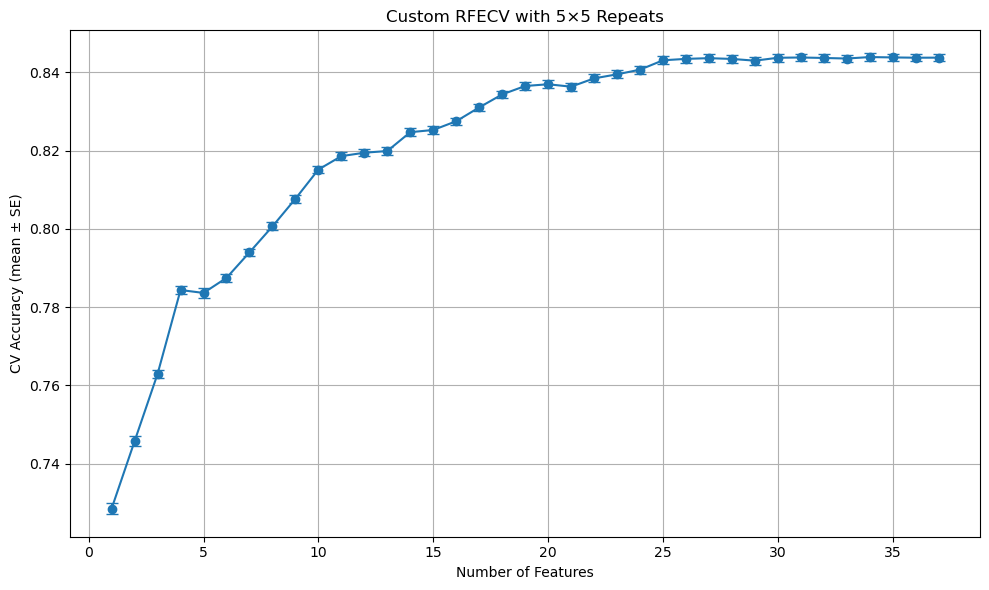

In [ ]:
# Baca data hasil RFECV jika belum ada di memori
df_custom_rfecv = pd.read_csv('custom_rfecv_results_linearsvc.csv')  # ganti nama file jika SVM

# Ringkasan statistik: rata-rata, standar deviasi, dan standard error
summary = df_custom_rfecv.groupby('n_features')['accuracy'].agg(['mean', 'std']).reset_index()
summary['se'] = summary['std'] / np.sqrt(30) 

# Tampilkan DataFrame summary (opsional)
print(summary)

# Plot akurasi dengan error bar (SE)
plt.figure(figsize=(10, 6))
plt.errorbar(summary['n_features'], summary['mean'], yerr=summary['se'], fmt='-o', capsize=4)
plt.xlabel("Number of Features")
plt.ylabel("CV Accuracy (mean ± SE)")
plt.title("Custom RFECV with 5×5 Repeats")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
summary.to_csv("summary_1se_svm_fix.csv", index=False)

In [ ]:
# 1. Akurasi terbaik dan SE-nya
best_row = summary.loc[summary['mean'].idxmax()]
best_score = best_row['mean']
best_se = best_row['se']
threshold = best_score - best_se

# 2. Cari jumlah fitur paling sedikit dengan akurasi >= threshold
parsimonious_row = summary[summary['mean'] >= threshold].iloc[0]

# 3. Hasil akhir
print("✅ Best score (mean CV accuracy):", round(best_score, 4))
print("✅ Best SE:", round(best_se, 4))
print("🎯 1-SE Threshold:", round(threshold, 4))
print("🔍 Parsimonious number of features:", parsimonious_row['n_features'])
print("📈 Accuracy at that point:", round(parsimonious_row['mean'], 4))


✅ Best score (mean CV accuracy): 0.8439
✅ Best SE: 0.001
🎯 1-SE Threshold: 0.8429
🔍 Parsimonious number of features: 25.0
📈 Accuracy at that point: 0.8431


In [ ]:
# Inisialisasi model SVM linear
svm = LinearSVC(C=1.0, max_iter=5000, dual=False, random_state=42)

# Pastikan X_train dalam bentuk DataFrame
feature_names = X_train.columns

k = 25
rfe = RFE(estimator=svm, n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)

# Ambil nama fitur yang terpilih
selected_features = feature_names[rfe.support_]

# Cetak hasil
print(f"\nFitur terpilih untuk k={k} (menggunakan LinearSVC):")
for i, name in enumerate(selected_features, 1):
    print(f"{i}. {name}")



Fitur terpilih untuk k=25 (menggunakan LinearSVC):
1. chroma_1
2. chroma_2
3. chroma_4
4. chroma_9
5. chroma_10
6. chroma_11
7. rms_mean
8. spectral_centroid_mean
9. spectral_bandwidth_mean
10. spectral_rolloff_mean
11. zcr_mean
12. mfcc_1
13. mfcc_2
14. mfcc_3
15. mfcc_4
16. mfcc_5
17. mfcc_6
18. mfcc_7
19. mfcc_9
20. mfcc_11
21. mfcc_12
22. mfcc_13
23. mfcc_14
24. mfcc_15
25. mfcc_18


In [ ]:
pd.Series(selected_features).reset_index().to_clipboard()